In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy.interpolate import RBFInterpolator

import skies

%config InlineBackend.figure_format = "retina"

In [2]:
# Read standard mesh resolution mesh file and plot
mesh_parameters_standard_resolution_file_name = "./data/western_north_america_mesh_parameters.json"
m1 = skies.read_meshes(mesh_parameters_standard_resolution_file_name)

# Read high resolution mesh file and plot
# mesh_parameters_high_resolution_file_name = "./data/western_north_america_mesh_parameters_dense.json"
mesh_parameters_high_resolution_file_name = "./data/western_north_america_mesh_parameters_bane_test.json"
m2 = skies.read_meshes(mesh_parameters_high_resolution_file_name)

# Read standard evolution np file
f = np.load("./data/cascadia_low_resolution_tde_dip_slip_rates.npy")


Warning: The file contains tag data that couldn't be processed.

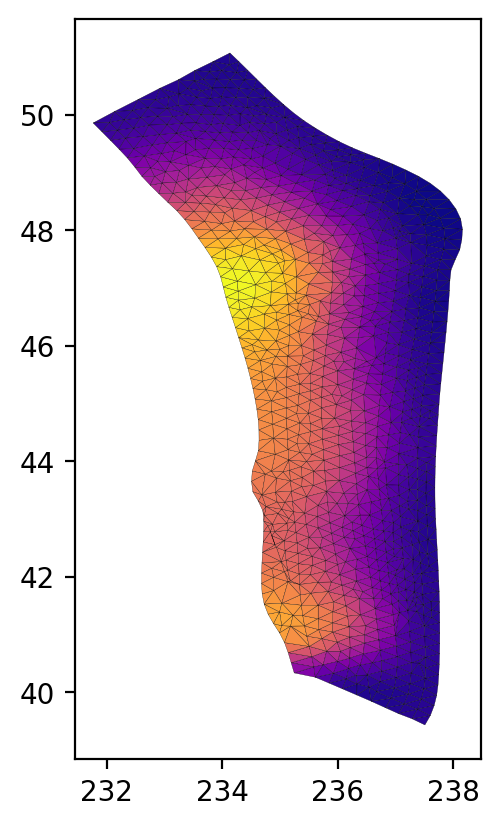

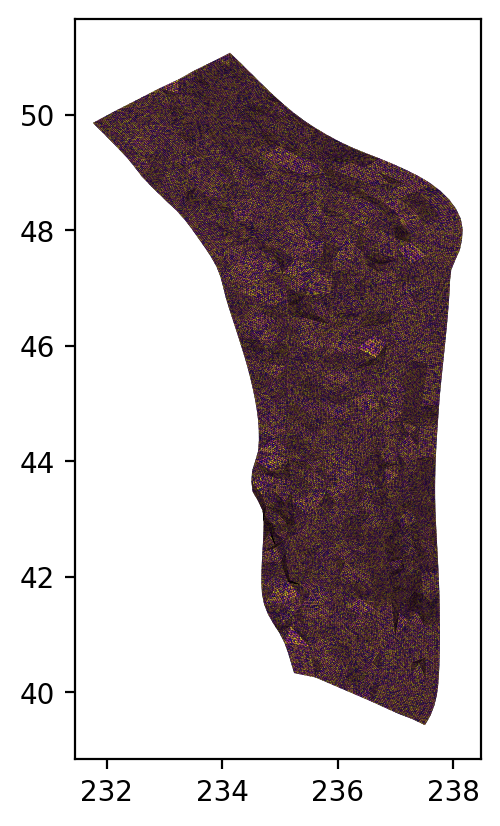

In [3]:
def plot_meshes(meshes, fill_value, ax):
    for i in range(len(meshes)):
        x_coords = meshes[i].meshio_object.points[:, 0]
        y_coords = meshes[i].meshio_object.points[:, 1]
        vertex_array = np.asarray(meshes[i].verts)

        if not ax:
            ax = plt.gca()
        xy = np.c_[x_coords, y_coords]
        verts = xy[vertex_array]
        pc = matplotlib.collections.PolyCollection(
            verts,
            edgecolor="k",
            cmap="plasma",
            linewidth=0.1,
            alpha=1.0,
        )
        pc.set_array(fill_value)
        ax.add_collection(pc)
        ax.autoscale()
        plt.gca().set_aspect("equal", adjustable="box")
        return pc


plt.figure()
# pc = plot_meshes(m1, np.random.rand(m1[0].x_centroid.size), plt.gca())
pc = plot_meshes(m1, f, plt.gca())
plt.show()

plt.figure()
pc = plot_meshes(m2, np.random.rand(m2[0].x_centroid.size), plt.gca())
plt.show()


In [4]:
# def rbf_interpolate():
#     # Observation coordinates and data
#     x_vec = np.linspace(m1[0].x_perimeter.min(), m1[0].x_perimeter.max(), 100)
#     y_vec = np.linspace(m1[0].y_perimeter.min(), m1[0].y_perimeter.max(), 100)
#     x_mat, y_mat = np.meshgrid(x_vec, y_vec)

#     centroids_lon = m1[0].centroids[:, 0]
#     centroids_dep = m1[0].centroids[:, 1]
#     centroids_val = f

#     # Package for RBFInterpolator
#     xgrid = np.stack((x_mat, y_mat))
#     xflat = xgrid.reshape(2, -1).T
#     xobs = np.vstack((centroids_lon, centroids_dep)).T
#     yobs = centroids_val
#     yflat = RBFInterpolator(xobs, yobs, kernel="cubic", smoothing=0.01, epsilon=1.5)(
#         xflat
#     )
#     return xflat, yflat

def rbf_interpolate():
    # Observation coordinates and data
    x_vec = np.linspace(m1[0].x_perimeter.min(), m1[0].x_perimeter.max(), 100)
    y_vec = np.linspace(m1[0].y_perimeter.min(), m1[0].y_perimeter.max(), 100)
    x_mat, y_mat = np.meshgrid(x_vec, y_vec)

    centroids_lon = m1[0].centroids[:, 0]
    centroids_dep = m1[0].centroids[:, 1]
    centroids_val = f

    # Package for RBFInterpolator
    xgrid = np.stack((x_mat, y_mat))
    xflat = xgrid.reshape(2, -1).T
    xflat = m2[0].centroids[:, 0:2]
    print(xflat)
    xobs = np.vstack((centroids_lon, centroids_dep)).T
    yobs = centroids_val
    yflat = RBFInterpolator(xobs, yobs, kernel="cubic", smoothing=0.01, epsilon=1.5)(
        xflat
    )
    return xflat, yflat

xflat, yflat = rbf_interpolate()

np.save("./data/cascadia_high_resolution_tde_dip_slip_rates_bane_test.npy", yflat)

[[234.17226156  46.50192261]
 [234.18961589  46.51870473]
 [234.16518148  46.52385712]
 ...
 [237.53160095  48.63643773]
 [237.55275981  48.61860275]
 [237.55601501  48.63050588]]


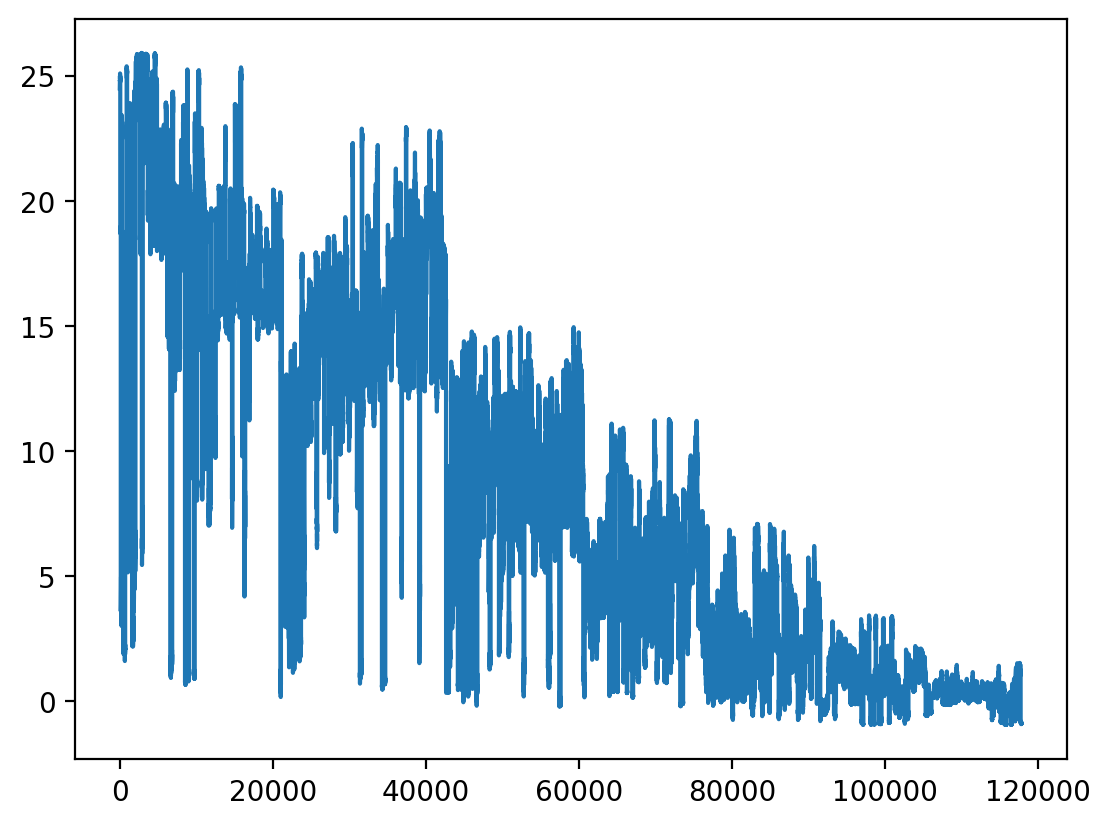

In [5]:
plt.plot(yflat)

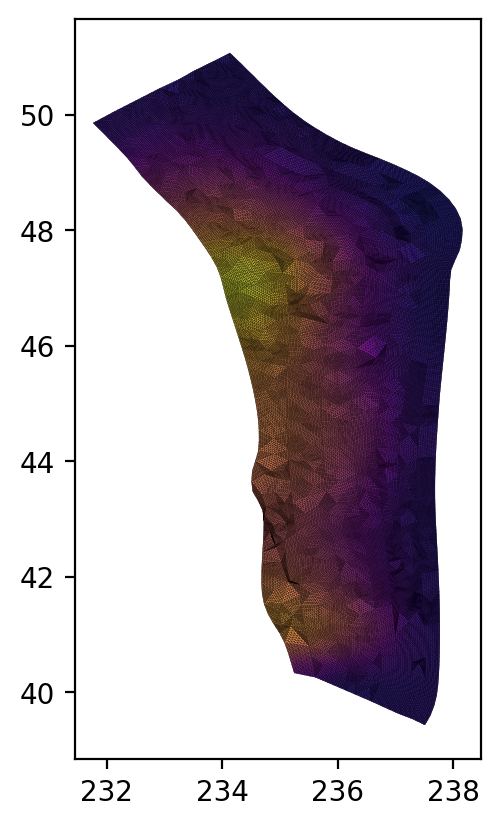

In [6]:
plt.figure()
pc = plot_meshes(m2, yflat, plt.gca())
plt.show()


In [7]:
m2[0].verts.shape

(117824, 3)